__Problem:__ We will explore several methods to see if certain characteristics or features can be used to predict whether an applicant defaults or pays his loan. Then we will use machine learning technics to develop a model to predict credit default. To reach this goal, we will implement a 3 steps project:

* Step 1-Identify and handle missing values

_Identify missing values_

_Evaluate the missing values_

_Deal with the missing values_

_Correct data format_

_Get indicator variables and assign them to dummy variables_

_Binning in order to categorise the loan value_


* Step 2- Analyse Individual Feature Patterns using Visualization and stastical technicques

* Step 3- Develop the Model 
        
The data come from : http://www.creditriskanalytics.net/datasets-private2.html
The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. 

# 1-Identify and handle missing values

_IMPORT ' Home Equity Data set' from the following link: http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv. 

In [92]:
import numpy as np
import pandas as pd
url = 'http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv'
df = pd.read_csv(url)
df.head()
#df.shape

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [93]:
#First lets only use numeric data
#df=df._get_numeric_data()


In [94]:
print(df.dtypes)

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object



__Evaluating for Missing Data__

The missing values are auto-converted to Python's default **NaN**. We use Python's built-in functions to identify these missing values by using *.isnull()* method to detect missing data:

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [95]:
missing_data = df.isnull()
missing_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True


In [96]:
# Identy the columns with missing values.

for column in missing_data.columns.values.tolist():
    print(column)
    #print (missing_data[column].value_counts())
    #print("") 

BAD
LOAN
MORTDUE
VALUE
REASON
JOB
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [97]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("") 

False    5960
Name: BAD, dtype: int64

False    5960
Name: LOAN, dtype: int64

False    5442
True      518
Name: MORTDUE, dtype: int64

False    5848
True      112
Name: VALUE, dtype: int64

False    5708
True      252
Name: REASON, dtype: int64

False    5681
True      279
Name: JOB, dtype: int64

False    5445
True      515
Name: YOJ, dtype: int64

False    5252
True      708
Name: DEROG, dtype: int64

False    5380
True      580
Name: DELINQ, dtype: int64

False    5652
True      308
Name: CLAGE, dtype: int64

False    5450
True      510
Name: NINQ, dtype: int64

False    5738
True      222
Name: CLNO, dtype: int64

False    4693
True     1267
Name: DEBTINC, dtype: int64



In [98]:
df.describe(include =['object'])

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


Current sample is 5960. Only columns " BAD" and "LOAN" do not have missing values. 

The next step now is to find a method to handle these missing values for the following features: MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO, DEBTINC.

__Dealing with missing values__ : Several options are available. a) no rows or columns can be dropped as they do not have enough empty values. b) The more reasonable options to deal with these missings values are to replace them by either mean or frequency.

There are 2 categorical variables in the data which are "REASON" and "JOB". We will use the frequency to replace the missing values. The obove table shows the most frequent values for "REASON" and "JOB"are repectively "DebtCon" and "Other". This can be observed as well by using the "value_counts" method below. Hence we will replace the missing values by "DebtCon" and "Other". 


In [99]:
#Number of missing values in Columns 'REASON' and 'JOB'

print('Number of NAN values for column REASON :', df["REASON"].isnull().sum())
print('Number of NAN values for column JOB :', df["JOB"].isnull().sum())

Number of NAN values for column REASON : 252
Number of NAN values for column JOB : 279


In [100]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [101]:
df['REASON'].value_counts().idxmax()

'DebtCon'

In [102]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [103]:
df['JOB'].value_counts().idxmax()

'Other'

In [104]:
df["REASON"].replace(np.nan, 'DebtCon', inplace=True)
df["JOB"].replace(np.nan, 'Other', inplace=True)
df.describe(include =['object'])

,REASON,JOB
count,5960,5960
unique,2,6
top,DebtCon,Other
freq,4180,2667


In [105]:
print('Number of NAN values for column REASON :', df["REASON"].isnull().sum())
print('Number of NAN values for column JOB :', df["JOB"].isnull().sum())

Number of NAN values for column REASON : 0
Number of NAN values for column JOB : 0


In [106]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


The next step is to replace the missing values in the remaining variables by their mean. These variables are :
MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO, DEBTINC.

In [107]:
# Computing the mean for each remaining variable and replacing NaN by mean value in each column
avg_MORTDUE = df["MORTDUE"].astype("float").mean(axis=0)
df['MORTDUE'].replace(np.nan, avg_MORTDUE, inplace = True)

avg_VALUE = df["VALUE"].astype("float").mean(axis=0)
df['VALUE'].replace(np.nan, avg_VALUE, inplace = True)

avg_YOJ = df["YOJ"].astype("float").mean(axis=0)
df['YOJ'].replace(np.nan, avg_YOJ, inplace = True)

avg_DEROG = df["DEROG"].astype("float").mean(axis=0)
df["DEROG"].replace(np.nan, avg_DEROG, inplace = True)

avg_DELINQ = df["DELINQ"].astype("float").mean(axis=0)
df["DELINQ"].replace(np.nan, avg_DELINQ, inplace = True)

avg_CLAGE = df["CLAGE"].astype("float").mean(axis=0)
df["CLAGE"].replace(np.nan, avg_CLAGE, inplace = True)

avg_NINQ = df["NINQ"].astype("float").mean(axis=0)
df["NINQ"].replace(np.nan, avg_NINQ, inplace = True)

avg_CLNO = df["CLNO"].astype("float").mean(axis=0)
df["CLNO"].replace(np.nan, avg_CLNO, inplace = True)

avg_DEBTINC = df["DEBTINC"].astype("float").mean(axis=0)
df["DEBTINC"].replace(np.nan, avg_DEBTINC, inplace = True)

print("avg_MORTDUE =", avg_MORTDUE)
print("avg_VALUE =", avg_VALUE)
print("avg_YOJ =", avg_YOJ)
print("avg_DEROG =", avg_DEROG)
print("avg_DELINQ =", avg_DELINQ)
print("avg_CLAGE =", avg_CLAGE)
print("avg_NINQ =", avg_NINQ)
print("avg_CLNO =", avg_CLNO)
print("avg_DEBTINC =", avg_DEBTINC)

avg_MORTDUE = 73760.817199559
avg_VALUE = 101776.04874145007
avg_YOJ = 8.922268135904499
avg_DEROG = 0.2545696877380046
avg_DELINQ = 0.4494423791821561
avg_CLAGE = 179.76627518656605
avg_NINQ = 1.1860550458715597
avg_CLNO = 21.29609620076682
avg_DEBTINC = 33.77991534872112


In [108]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


# Check the dataset in order to ensure there are no missing data

In [109]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [110]:
No_missing_data = df.isnull()
No_missing_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [111]:
for column in No_missing_data.columns.values.tolist():
    print (No_missing_data[column].value_counts())
    print("") 

False    5960
Name: BAD, dtype: int64

False    5960
Name: LOAN, dtype: int64

False    5960
Name: MORTDUE, dtype: int64

False    5960
Name: VALUE, dtype: int64

False    5960
Name: REASON, dtype: int64

False    5960
Name: JOB, dtype: int64

False    5960
Name: YOJ, dtype: int64

False    5960
Name: DEROG, dtype: int64

False    5960
Name: DELINQ, dtype: int64

False    5960
Name: CLAGE, dtype: int64

False    5960
Name: NINQ, dtype: int64

False    5960
Name: CLNO, dtype: int64

False    5960
Name: DEBTINC, dtype: int64



In [112]:
df.to_csv('clean_Nonildata.csv')

# Get indicator variables and assign it to data frame "dummy_variables


In [113]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [114]:
df['REASON'].value_counts()

DebtCon    4180
HomeImp    1780
Name: REASON, dtype: int64

In [115]:
dummy_variable_1 = pd.get_dummies(df["REASON"])
dummy_variable_1.head()

,DebtCon,HomeImp
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [116]:
# Replace the dummy variables 'DebtCon' and 'HomeImp'their values
df["REASON"].replace("DebtCon", "1", inplace = True)
df["REASON"].replace("HomeImp", "1", inplace = True)
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,1,Other,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,1,Other,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,1,Other,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,1,Other,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,1,Office,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915


In [117]:
# correct data format
df["REASON"]=df["REASON"].astype(int, copy=True)
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON       int64
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [118]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.0,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,1.0,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,0.0,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,1.0,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,1.0,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,1.0,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,1.0,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [119]:
df.corr()['BAD'].sort_values()

CLAGE     -0.165113
LOAN      -0.075099
YOJ       -0.058314
MORTDUE   -0.046034
VALUE     -0.028852
CLNO      -0.004067
DEBTINC    0.124324
NINQ       0.168851
DEROG      0.264068
DELINQ     0.341472
BAD        1.000000
REASON          NaN
Name: BAD, dtype: float64

In [120]:
df['JOB'].value_counts()

Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [121]:
dummy_variable_2 = pd.get_dummies(df["JOB"])
dummy_variable_2.head()

,Mgr,Office,Other,ProfExe,Sales,Self
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


# We now have the values 0 and 1 to represent the dummy variables, we will now insert this column back into our original dataset.

In [122]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "REASON" from "df"
df.drop("REASON", axis = 1, inplace=True)

# merge data frame "df" and "dummy_variable_2" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "JOB" from "df"
df.drop("JOB", axis = 1, inplace=True)

In [123]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,0,1,0,0,1,0,0,0
1,1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,0,1,0,0,1,0,0,0
2,1,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,0,1,0,0,1,0,0,0
3,1,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,1,0,0,0,1,0,0,0
4,0,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0


# Categorise the loan value into 4 bins of equal size bandwith. First let's plot the distribution of loan Value

Text(0.5, 1.0, 'LOAN bins')

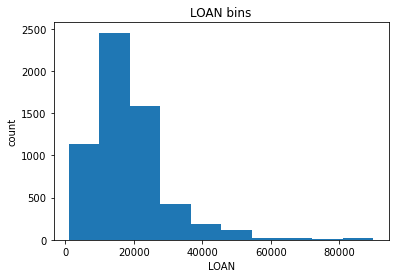

In [124]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["LOAN"])

# set x/y labels and plot title
plt.pyplot.xlabel("LOAN")
plt.pyplot.ylabel("count")
plt.pyplot.title("LOAN bins")

In [125]:
df['LOAN'].max()
print ('Lowest Loan is :', df['LOAN'].min(), 'Highest Loan is :',df['LOAN'].max())

Lowest Loan is : 1100 Highest Loan is : 89900


In [126]:
# 4 bins of equal size bandwith
bins = np.linspace(min(df["LOAN"]), max(df["LOAN"]), 5)
bins

array([ 1100., 23300., 45500., 67700., 89900.])

In [127]:
# Let's see the bin group names and apply the  function "cut" to determine what each value of "df['LOAN']" belongs to.
group_names = ['Low','Moderate', 'Medium', 'High']
df['LOAN_BINNED'] = pd.cut(df['LOAN'], bins, labels=group_names, include_lowest=True )
df[['LOAN','LOAN_BINNED']].tail(5)

,LOAN,LOAN_BINNED
5955,88900,High
5956,89000,High
5957,89200,High
5958,89800,High
5959,89900,High


In [128]:
# checking the bin classification
df["LOAN_BINNED"].value_counts()

Low         4477
Moderate    1295
Medium       147
High          41
Name: LOAN_BINNED, dtype: int64

Text(0.5, 1.0, 'Loan Value Classification')

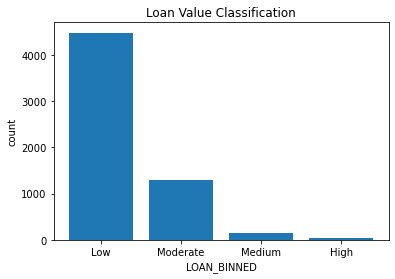

In [129]:
#plotting the distribution for reach bin

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["LOAN_BINNED"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("LOAN_BINNED")
plt.pyplot.ylabel("count")
plt.pyplot.title("Loan Value Classification")

In [130]:
# We have now a dataframe with the categorisation for each loan in the last column' VALUE_BINNED'.
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,LOAN_BINNED
0,1,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,0,1,0,0,1,0,0,0,Low
1,1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,0,1,0,0,1,0,0,0,Low
2,1,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,0,1,0,0,1,0,0,0,Low
3,1,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,1,0,0,0,1,0,0,0,Low
4,0,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0,Low


Text(0.5, 1.0, 'Loan Value Classification')

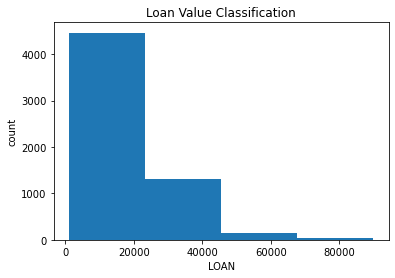

In [131]:
# Visualising the newly created bins with a Histogram
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2,3)

# draw historgram of attribute "horsepower" with bins = 4
plt.pyplot.hist(df["LOAN"], bins = 4)

# set x/y labels and plot title
plt.pyplot.xlabel("LOAN")
plt.pyplot.ylabel("count")
plt.pyplot.title("Loan Value Classification")

In [132]:
# Normalising the DATA
#df_mean = (df- df.mean())/df.std()
#df_mean.head()

In [133]:
# Save the new dataframe into csv format

In [134]:
df.to_csv('clean_Loandata.csv')

In [135]:
# Let's separate y_data from x_data (features)
y_data = df['BAD']
# Drop bad debt from the x_data
x_data=df.drop('BAD',axis=1)
x_data

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,LOAN_BINNED
0,1100,25860.0000,39025.000000,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,33.779915,0,1,0,0,1,0,0,0,Low
1,1300,70053.0000,68400.000000,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,33.779915,0,1,0,0,1,0,0,0,Low
2,1500,13500.0000,16700.000000,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,33.779915,0,1,0,0,1,0,0,0,Low
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,1,0,0,0,1,0,0,0,Low
4,1700,97800.0000,112000.000000,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.0000,90185.000000,16.000000,0.00000,0.000000,221.808718,0.000000,16.000000,36.112347,1,0,0,0,1,0,0,0,High
5956,89000,54576.0000,92937.000000,16.000000,0.00000,0.000000,208.692070,0.000000,15.000000,35.859971,1,0,0,0,1,0,0,0,High
5957,89200,54045.0000,92924.000000,15.000000,0.00000,0.000000,212.279697,0.000000,15.000000,35.556590,1,0,0,0,1,0,0,0,High
5958,89800,50370.0000,91861.000000,14.000000,0.00000,0.000000,213.892709,0.000000,16.000000,34.340882,1,0,0,0,1,0,0,0,High


# This concludes the first part of this project. In the second part, the focus will be on the exploration and data analysis in order to identify the most relevant features that can be used to predict loan default